In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
print("Size of data : ", iris_df.shape) 

Size of data :  (150, 5)


<Axes: xlabel='Sepal_Length', ylabel='Petal_Length'>

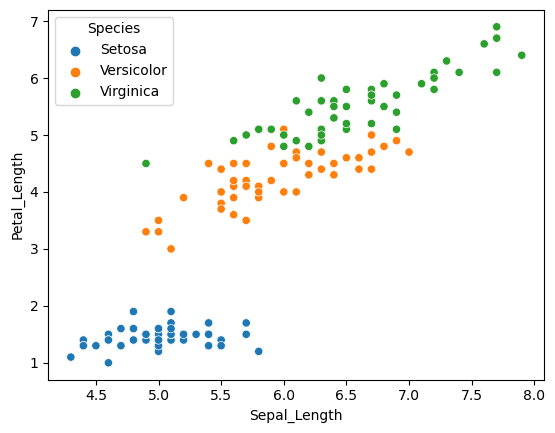

In [5]:
sns.scatterplot(x='Sepal_Length',y='Petal_Length', hue='Species', data=iris_df)

### Binary Classification

### 1.Setosa vs Non-Setosa

In [6]:
iris_df["s_ns"]=np.where(iris_df["Species"]=="Setosa", 1,0)

In [7]:
iris_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,s_ns
0,5.1,3.5,1.4,0.2,Setosa,1
1,4.9,3.0,1.4,0.2,Setosa,1
2,4.7,3.2,1.3,0.2,Setosa,1
3,4.6,3.1,1.5,0.2,Setosa,1
4,5.0,3.6,1.4,0.2,Setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,0
146,6.3,2.5,5.0,1.9,Virginica,0
147,6.5,3.0,5.2,2.0,Virginica,0
148,6.2,3.4,5.4,2.3,Virginica,0


<Axes: xlabel='Petal_Length', ylabel='Petal_Width'>

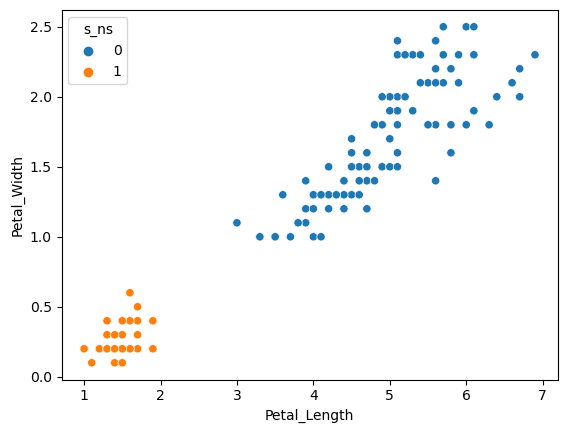

In [8]:
sns.scatterplot(x=iris_df["Petal_Length"], y=iris_df["Petal_Width"], data=iris_df, hue="s_ns")

In [9]:
X=iris_df[["Petal_Length","Petal_Width"]]
y=iris_df["s_ns"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.Using Linear Kernel

In [11]:
from sklearn.svm import SVC

In [12]:
linear_svm = SVC(kernel = "linear")
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
SVC(kernel='linear')

SVC(kernel='linear')

In [14]:
predictions_test = linear_svm.predict(X_test)
predictions_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1])

In [15]:
predictions_train = linear_svm.predict(X_train)
predictions_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [16]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [17]:
print("Linear SVM Accuracy : ", accuracy_score(y_train, predictions_train))

Linear SVM Accuracy :  1.0


In [18]:
y.ravel()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, 'Decision boundary of linear SVM')

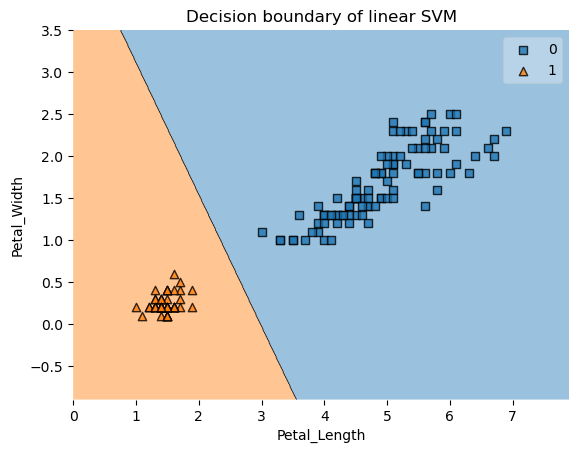

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=linear_svm)
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")
plt.title("Decision boundary of linear SVM")

### 2.Versicolor vs Non-versicolor

In [20]:
iris_df["v_nv"] = np.where(iris_df["Species"]=="Versicolor" , 1,0)

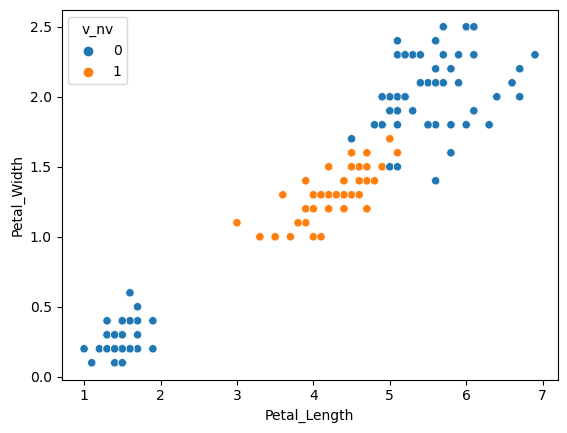

In [21]:
sns.scatterplot(x=iris_df["Petal_Length"], y=iris_df["Petal_Width"], data=iris_df, hue="v_nv")
plt.show()

In [22]:
X=iris_df[["Petal_Length","Petal_Width"]]
y=iris_df["v_nv"]

### 1.Linear SVM

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.svm import SVC

In [25]:
linear_svm = SVC(kernel = "linear")
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
SVC(kernel='linear')

SVC(kernel='linear')

In [27]:
predictions_test = linear_svm.predict(X_test)
predictions_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [28]:
predictions_train = linear_svm.predict(X_train)
predictions_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [30]:
print("Linear SVM Accuracy : ", accuracy_score(y_train, predictions_train))

Linear SVM Accuracy :  0.6476190476190476


In [31]:
y.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, 'Decision boundary of linear SVM')

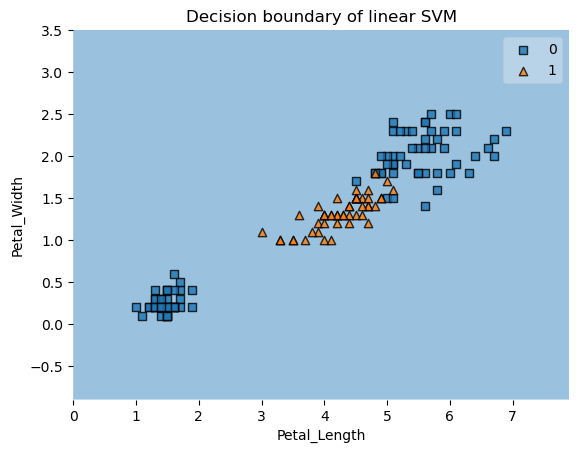

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=linear_svm)
plt.xlabel("Petal_Length")
plt.ylabel("Petal_Width")
plt.title("Decision boundary of linear SVM")

### 2.Using Polynomial Kernel

In [33]:
poly_svm=SVC(kernel="poly")
poly_svm.fit(X,y)
predictions=poly_svm.predict(X)

In [34]:
print("Polynomial SVM Accuracy : ", accuracy_score(y, predictions))

Polynomial SVM Accuracy :  0.6666666666666666


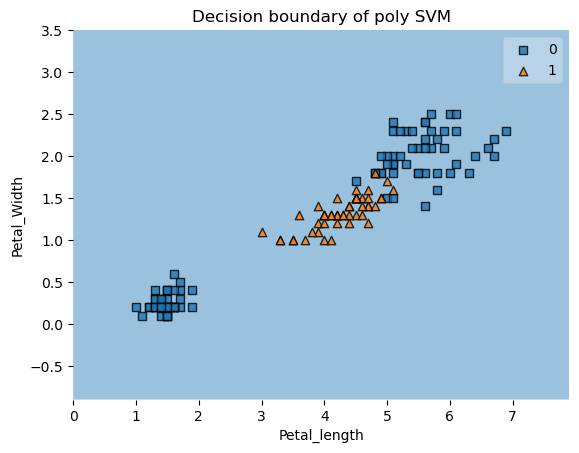

In [35]:
plot_decision_regions(X.values, y.ravel(), clf=poly_svm)
plt.xlabel("Petal_length")
plt.ylabel("Petal_Width")
plt.title("Decision boundary of poly SVM")
plt.show()

### 3.Using Radial Kernel

In [36]:
rbf_svm=SVC(kernel="rbf")
rbf_svm.fit(X,y)

SVC()

In [37]:
predictions=rbf_svm.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
print("RBF SVM accuracy : ", accuracy_score(y, predictions))

RBF SVM accuracy :  0.9533333333333334


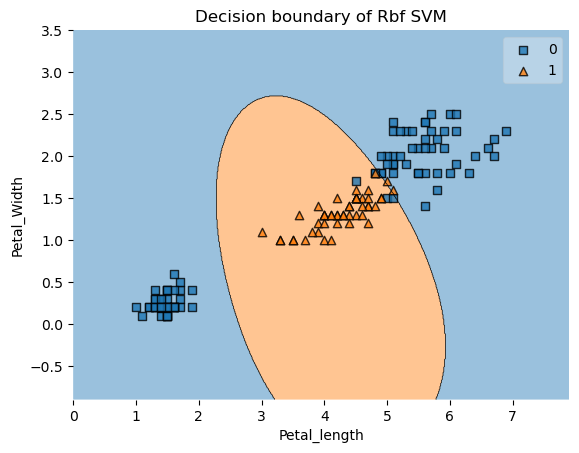

In [39]:
plot_decision_regions(X.values, y.ravel(), clf=rbf_svm)
plt.xlabel("Petal_length")
plt.ylabel("Petal_Width")
plt.title("Decision boundary of Rbf SVM")
plt.show()

### Multi-Class classification

In [40]:
iris_df["Species"].value_counts()

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [41]:
species_numeric = []
for i in iris_df["Species"]:
    if(i=="Setosa"):
        species_numeric.append(0)
    elif(i=="Versicolor"):
        species_numeric.append(1)
    else:
        species_numeric.append(2)

In [42]:
iris_df["Species_numeric"] = species_numeric

In [43]:
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,s_ns,v_nv,Species_numeric
0,5.1,3.5,1.4,0.2,Setosa,1,0,0
1,4.9,3.0,1.4,0.2,Setosa,1,0,0
2,4.7,3.2,1.3,0.2,Setosa,1,0,0
3,4.6,3.1,1.5,0.2,Setosa,1,0,0
4,5.0,3.6,1.4,0.2,Setosa,1,0,0


In [44]:
X=iris_df[["Petal_Length", "Petal_Width"]]
y=iris_df[["Species_numeric"]]

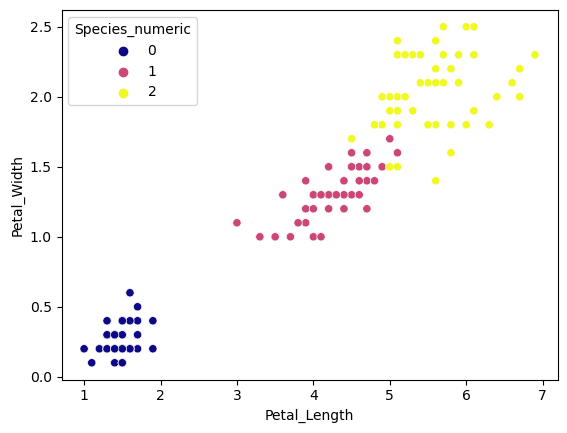

In [45]:
sns.scatterplot(x=iris_df["Petal_Length"], y=iris_df["Petal_Width"], data=iris_df, hue="Species_numeric", palette="plasma")
plt.show()

### 1.Using rbf kernel

In [46]:
rbf_multi_svm=SVC(kernel="rbf")
rbf_multi_svm.fit(X,y)

SVC()

In [47]:
predictions=rbf_multi_svm.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [48]:
print("RBF multiclass SVM Accuracy: ",accuracy_score(y,predictions))

RBF multiclass SVM Accuracy:  0.9533333333333334


In [49]:
plot_decision_regions(X.values, y.ravel(), clf=rbf_multi_svm)
plt.xlabel("Petal_length")
plt.ylabel("Petal_Width")
plt.title("Decision boundary of Rbf SVM")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ravel'

### 2.Using Polynomial Kernel

In [51]:
poly_multi_svm=SVC(kernel="poly")
poly_multi_svm.fit(X,y)

SVC(kernel='poly')

In [52]:
predictions=rbf_multi_svm.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [53]:
print("Polynomial multiclass SVM Accuracy: ",accuracy_score(y,predictions))

Polynomial multiclass SVM Accuracy:  0.9533333333333334


In [55]:
plot_decision_regions(X.values, y.ravel(), clf=poly_multi_svm)
plt.xlabel("Petal_length")
plt.ylabel("Petal_Width")
plt.title("Decision boundary of Polynomial SVM")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ravel'

### Tuning hyperparameter C

In [57]:
dummy_df=pd.read_csv("dummy.csv")
dummy_df.head()

,x1,x2,y
0,4.7,1.4,1
1,4.5,1.5,1
2,4.0,1.3,1
3,4.6,1.5,1
4,4.5,1.3,1


In [58]:
print("Size of data: ", dummy_df.shape)

Size of data:  (88, 3)


In [59]:
X=dummy_df[["x1","x2"]]
y=dummy_df["y"]

<Axes: xlabel='x1', ylabel='x2'>

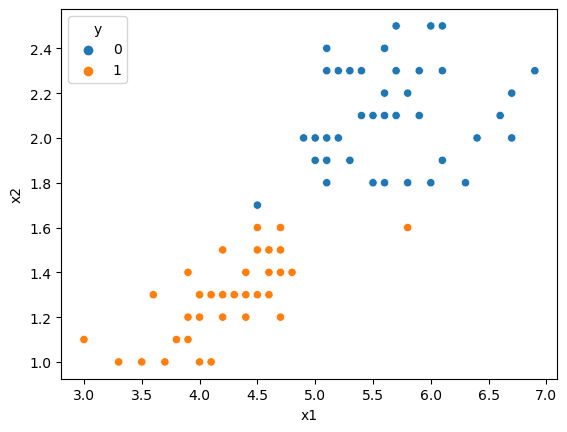

In [60]:
sns.scatterplot(x=dummy_df["x1"], y=dummy_df["x2"], data=dummy_df, hue="y")

### Model 1- Using default value of C = 1.0

In [62]:
linear_svm = SVC(kernel = "linear")
linear_svm.fit(X, y)
predictions=linear_svm.predict(X)
predictions
print("Linear SVM Accuracy: ",accuracy_score(y,predictions))

Linear SVM Accuracy:  0.9772727272727273


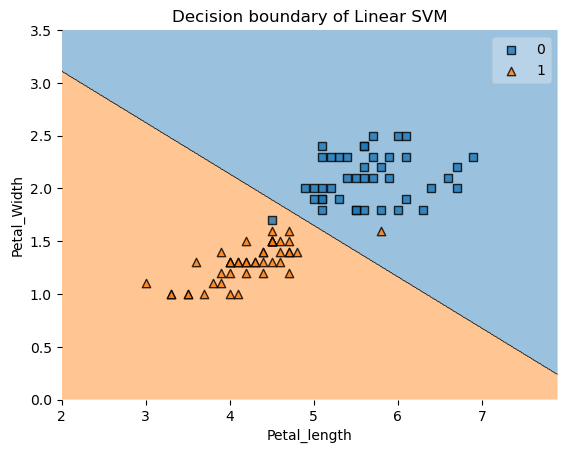

In [65]:
plot_decision_regions(X.values, y.ravel(), clf=linear_svm)
plt.xlabel("Petal_length")
plt.ylabel("Petal_Width")
plt.title("Decision boundary of Linear SVM")
plt.show()

### Model 2 - Using C=10

In [69]:
linear_svm = SVC(kernel = "linear", C=10)
linear_svm.fit(X, y)
predictions=linear_svm.predict(X)
predictions
print("Linear SVM Accuracy: ",accuracy_score(y,predictions))

Linear SVM Accuracy:  0.9772727272727273


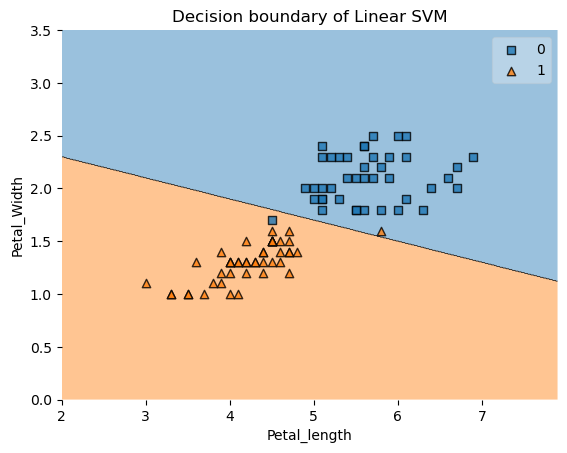

In [70]:
plot_decision_regions(X.values, y.ravel(), clf=linear_svm)
plt.xlabel("Petal_length")
plt.ylabel("Petal_Width")
plt.title("Decision boundary of Linear SVM")
plt.show()

### Model 3 - Using C=100

In [71]:
linear_svm = SVC(kernel = "linear", C=100)
linear_svm.fit(X, y)
predictions=linear_svm.predict(X)
predictions
print("Linear SVM Accuracy: ",accuracy_score(y,predictions))

Linear SVM Accuracy:  1.0


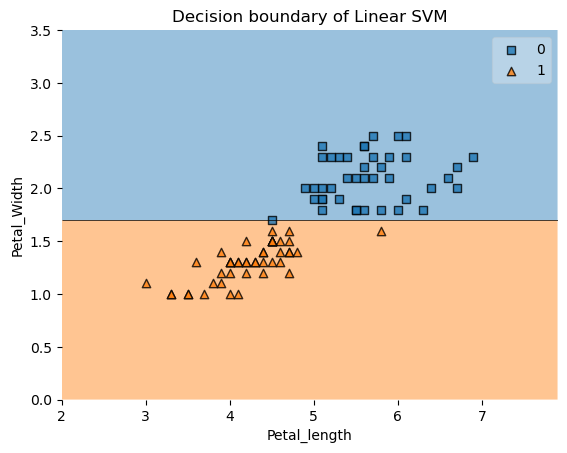

In [72]:
plot_decision_regions(X.values, y.ravel(), clf=linear_svm)
plt.xlabel("Petal_length")
plt.ylabel("Petal_Width")
plt.title("Decision boundary of Linear SVM")
plt.show()

### Using GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {'C' : [0.1, 1, 10, 50, 100]}

In [76]:
grid=GridSearchCV(SVC(kernel = "linear"), param_grid, refit = True, verbose = 3)
grid.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.944 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.941 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.944 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.941 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=0.944 total time=   0.0s
[CV 2/5] END ..............................C=10;,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 50, 100]}, verbose=3)

In [77]:
print(grid.best_params_)

{'C': 50}


In [78]:
print(grid.best_estimator_)

SVC(C=50, kernel='linear')


In [79]:
rang=list(range(1,100,2))
rang

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99]

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":list(range(1,100,2))}
grid=GridSearchCV(SVC(),param_grid, verbose=3)
grid.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ...............................C=1;, score=0.944 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.941 total time=   0.0s
[CV 1/5] END ...............................C=3;, score=0.944 total time=   0.0s
[CV 2/5] END ...............................C=3;, score=1.000 total time=   0.0s
[CV 3/5] END ...............................C=3;, score=1.000 total time=   0.0s
[CV 4/5] END ...............................C=3;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=3;, score=0.941 total time=   0.0s
[CV 1/5] END ...............................C=5;, score=0.944 total time=   0.0s
[CV 2/5] END ...............................C=5

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25,
                               27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49,
                               51, 53, 55, 57, 59, ...]},
             verbose=3)